In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest, f_classif
import pandas as pd

In [2]:
path = "/Users/vineethrayadurgam/Desktop/Machine Learning 245/FINAL_LA_FIRE_ML_DATA_MERGED.csv"
df = pd.read_csv(path)

In [3]:
df.head()

,date,fire_count,Fire_Occurred,STATION,NAME,AWND,DAPR,MDPR,PGTM,PRCP,...,WT11,year,month,PRCP_7D,AWND_7D,PRCP_prev,AWND_prev,is_dry,dry_streak,LST_Day_C
0,2014-12-27,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12.674622
1,2014-12-28,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12.674622
2,2014-12-29,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12.674622
3,2014-12-30,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12.674622
4,2014-12-31,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12.674622


In [4]:
df['date'] = pd.to_datetime(df['date'], errors='coerce')

In [5]:
print(f"Dataset shape: {df.shape}")
print("\nFirst few rows:")
print(df.head())
print("\nData types:")
print(df.dtypes)
print("\nBasic statistics:")
print(df.describe())

Dataset shape: (225016, 36)

First few rows:
        date  fire_count  Fire_Occurred STATION NAME  AWND  DAPR  MDPR  PGTM  \
0 2014-12-27           0              0     NaN  NaN   NaN   NaN   NaN   NaN   
1 2014-12-28           0              0     NaN  NaN   NaN   NaN   NaN   NaN   
2 2014-12-29           0              0     NaN  NaN   NaN   NaN   NaN   NaN   
3 2014-12-30           0              0     NaN  NaN   NaN   NaN   NaN   NaN   
4 2014-12-31           0              0     NaN  NaN   NaN   NaN   NaN   NaN   

   PRCP  ...  WT11  year  month  PRCP_7D  AWND_7D  PRCP_prev  AWND_prev  \
0   NaN  ...   NaN   NaN    NaN      NaN      NaN        NaN        NaN   
1   NaN  ...   NaN   NaN    NaN      NaN      NaN        NaN        NaN   
2   NaN  ...   NaN   NaN    NaN      NaN      NaN        NaN        NaN   
3   NaN  ...   NaN   NaN    NaN      NaN      NaN        NaN        NaN   
4   NaN  ...   NaN   NaN    NaN      NaN      NaN        NaN        NaN   

   is_dry  dry_streak  

Missing values per column:
STATION            5
NAME               5
AWND               5
DAPR          224456
MDPR          224460
PGTM          223500
PRCP               5
TAVG          178212
TMAX          121077
TMIN          121263
TOBS          191517
WDF2          196188
WESD          221738
WESF          221704
WSF2          196187
WT01          216245
WT02          224112
WT03          224643
WT05          225010
WT06          225010
WT07          224997
WT08          215050
WT10          225015
WT11          225013
year               5
month              5
PRCP_7D            5
AWND_7D            5
PRCP_prev          6
AWND_prev          6
is_dry             5
dry_streak         5
dtype: int64


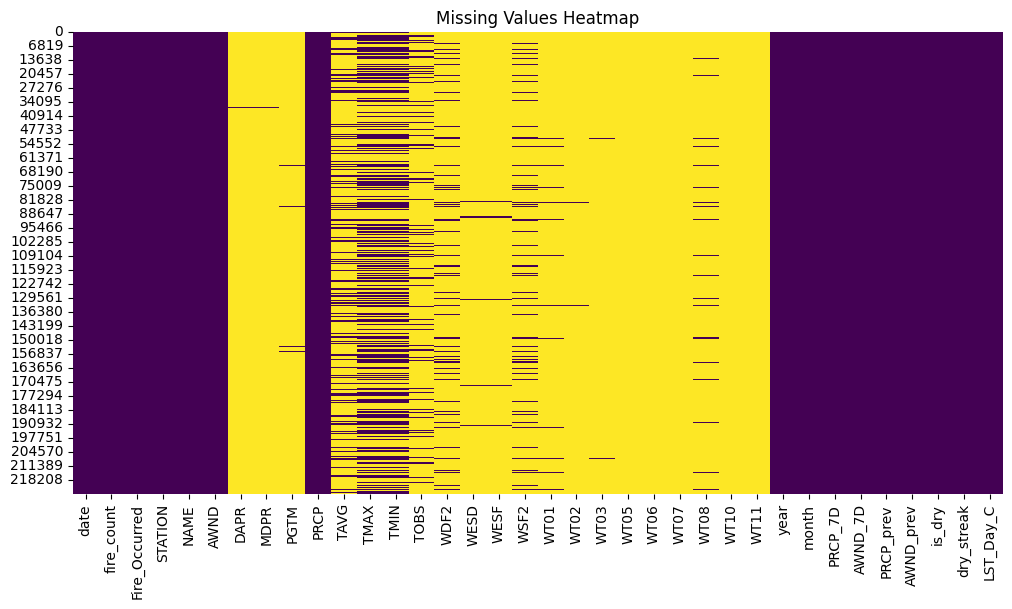

In [6]:
# Check for missing values
missing_values = df.isnull().sum()
print("Missing values per column:")
print(missing_values[missing_values > 0])

# Visualizing missing values
plt.figure(figsize=(12, 6))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title("Missing Values Heatmap")
plt.show()

In [7]:
cols_to_drop = ['DAPR', 'MDPR', 'PGTM'] + [f'WT{str(i).zfill(2)}' for i in range(1, 12)]
cols_to_drop += ['TOBS', 'WDF2', 'WESD', 'WESF', 'WSF2']
existing_cols_to_drop = [col for col in cols_to_drop if col in df.columns]
df = df.drop(columns=existing_cols_to_drop)

In [8]:
duplicate_count = df.duplicated().sum()
print(f"Number of duplicate rows: {duplicate_count}")

Number of duplicate rows: 0


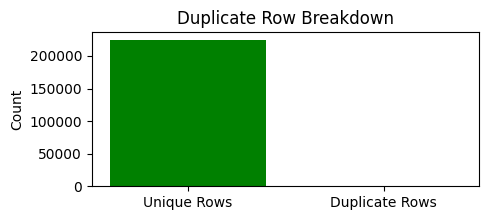

In [9]:
import matplotlib.pyplot as plt

plt.figure(figsize=(5, 2))
plt.bar(['Unique Rows', 'Duplicate Rows'], [len(df) - duplicate_count, duplicate_count], color=['green', 'red'])
plt.title("Duplicate Row Breakdown")
plt.ylabel("Count")
plt.show()

In [10]:
df = df.drop(columns=['NAME']) #Same as station column representing the name of the station, redundant column

# Encode STATION using category codes
df['STATION'] = df['STATION'].astype(str)
df['STATION_ENC'] = df['STATION'].astype('category').cat.codes
df = df.drop(columns=['STATION'])

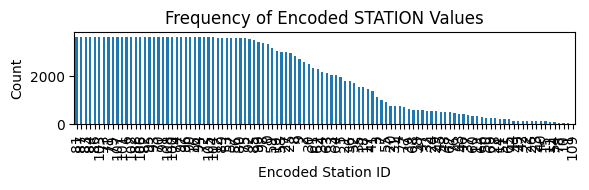

In [11]:
plt.figure(figsize=(6,2))
df['STATION_ENC'].value_counts().plot(kind='bar')
plt.title("Frequency of Encoded STATION Values")
plt.xlabel("Encoded Station ID")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

#### EDA (Exploratory Data Analysis)

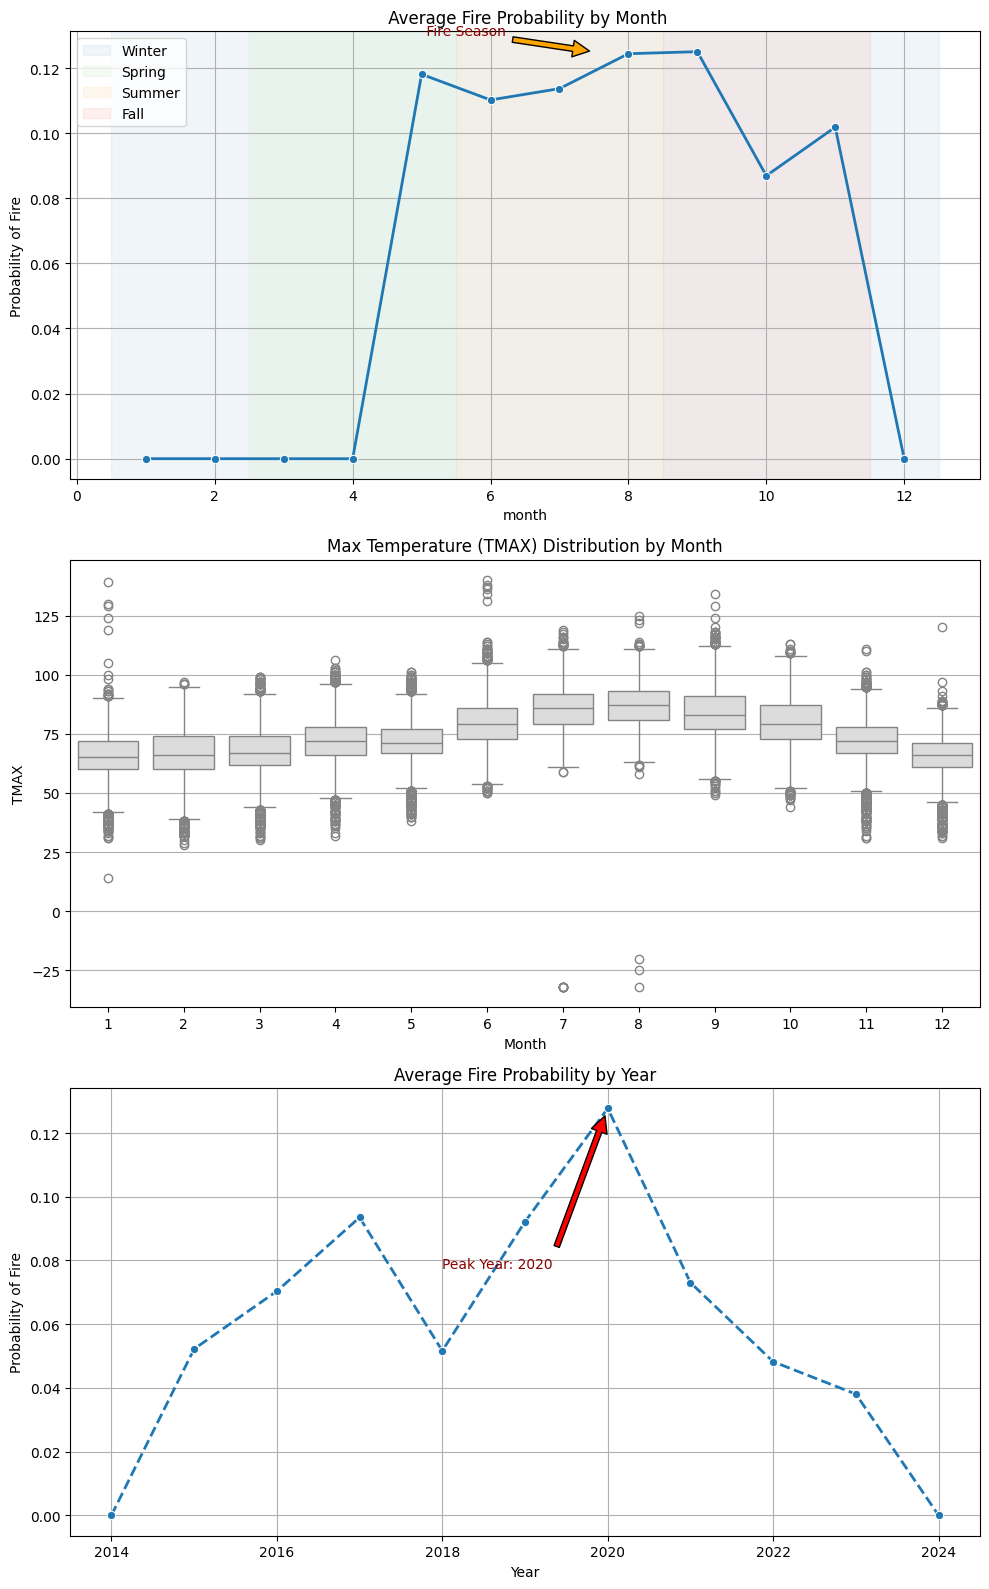

In [12]:
df['date'] = pd.to_datetime(df['date'])
df['month'] = df['date'].dt.month
df['year'] = df['date'].dt.year

#seasons
season_colors = {
    'Winter': '#b3cde3', 'Spring': '#ccebc5',
    'Summer': '#fed9a6', 'Fall': '#fbb4ae'
}
season_map = {
    12: 'Winter', 1: 'Winter', 2: 'Winter',
    3: 'Spring', 4: 'Spring', 5: 'Spring',
    6: 'Summer', 7: 'Summer', 8: 'Summer',
    9: 'Fall', 10: 'Fall', 11: 'Fall'
}
df['season'] = df['month'].map(season_map)

# Aggregations for plots
monthly_fire_prob = df.groupby('month')['Fire_Occurred'].mean()
tmax_monthly = df[['month', 'TMAX']].dropna()
yearly_fire_rate = df.groupby('year')['Fire_Occurred'].mean()

# Peak fire year
peak_year = yearly_fire_rate.idxmax()
peak_value = yearly_fire_rate.max()

# Plotting
fig, axs = plt.subplots(3, 1, figsize=(10, 16))

# 1. Monthly Fire Probability
axs[0].set_title(" Average Fire Probability by Month")
for season, color in season_colors.items():
    months = [m for m, s in season_map.items() if s == season]
    axs[0].axvspan(min(months)-0.5, max(months)+0.5, color=color, alpha=0.2, label=season)

sns.lineplot(x=monthly_fire_prob.index, y=monthly_fire_prob.values, ax=axs[0], marker='o', linewidth=2)
axs[0].set_ylabel("Probability of Fire")
axs[0].legend()
axs[0].grid(True)
axs[0].annotate(" Fire Season", xy=(7.5, 0.125), xytext=(5, 0.13), arrowprops=dict(facecolor='orange', shrink=0.05), fontsize=10, 
                color='darkred')

# 2. Boxplot for TMAX
tmax_monthly['dummy'] = 1
sns.boxplot(data=tmax_monthly, x='month', y='TMAX', hue='dummy', palette='coolwarm', ax=axs[1], legend=False)
axs[1].set_title("Max Temperature (TMAX) Distribution by Month")
axs[1].set_xlabel("Month")
axs[1].set_ylabel("TMAX")
axs[1].grid(True, axis='y')

# 3. Yearly Fire Rate Trend with annotation
sns.lineplot(x=yearly_fire_rate.index, y=yearly_fire_rate.values, ax=axs[2], marker='o', linestyle='--', linewidth=2)
axs[2].set_title("Average Fire Probability by Year")
axs[2].set_xlabel("Year")
axs[2].set_ylabel("Probability of Fire")
axs[2].grid(True)
axs[2].annotate(
    f"Peak Year: {peak_year}", 
    xy=(peak_year, peak_value), 
    xytext=(peak_year - 2, peak_value - 0.05),
    arrowprops=dict(facecolor='red', shrink=0.05),
    fontsize=10, color='darkred'
)

plt.tight_layout()
plt.show()

#### Average Fire Probability by Month

There's a clear seasonal pattern with fire probability rising dramatically in April (month 4), peaking during summer months (June-August, months 6-8), and declining through fall before reaching near-zero in winter.

The fire season appears to be concentrated between April and November, with virtually no fires occurring during winter months (December through March).

#### Max Temperature (TMAX) Distribution by Month

Temperature distributions show a strong seasonal pattern with highest median temperatures and most extreme high values occurring in summer months (June-September).

There's considerable temperature variability within each month (wide boxplots), with some anomalous values in certain months, including extremely cold temperatures in July-August that may represent unusual weather events.

#### Average Fire Probability by Year

Fire probability shows significant year-to-year variation with a pronounced peak in 2020 (marked as "Peak Year: 2020"), suggesting some years have substantially higher fire risk.

There's a general increasing trend from 2014 to 2020, followed by a declining trend from 2020 to 2024, which could indicate multi-year climate patterns affecting fire conditions.

#### These visualizations were invaluable for deriving new features based on **domain knowledge**, such as creating **seasonal indicators**, temperature thresholds for **fire risk**, identifying **peak fire months**, and incorporating year-specific risk factors to capture the temporal patterns evident in the historical data.

### Box Plots to identify Outliers

In [13]:
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns

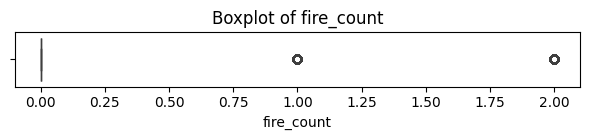

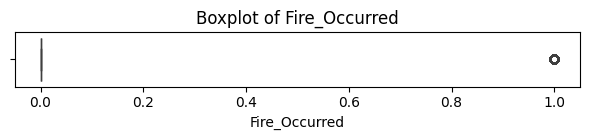

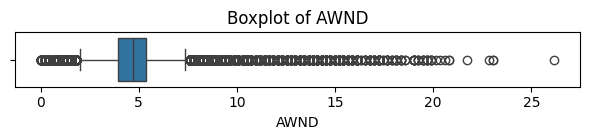

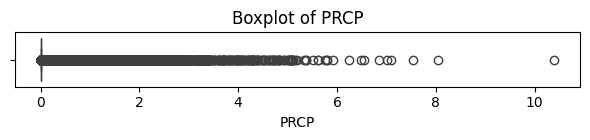

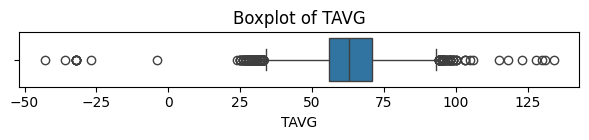

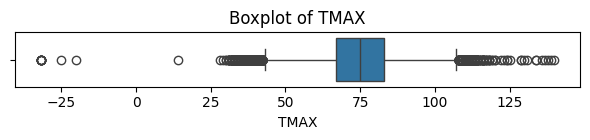

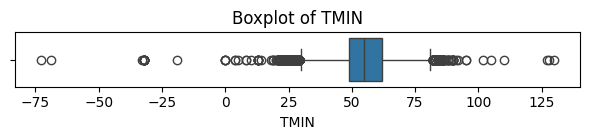

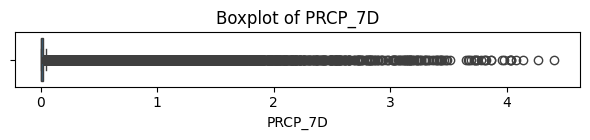

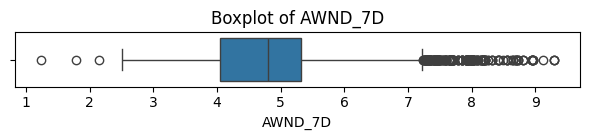

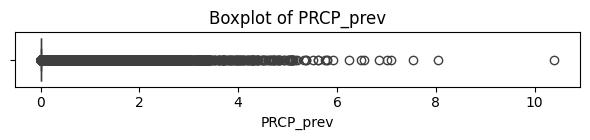

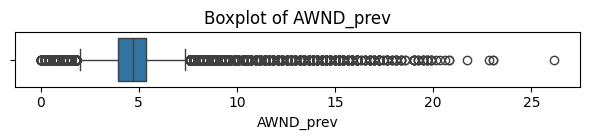

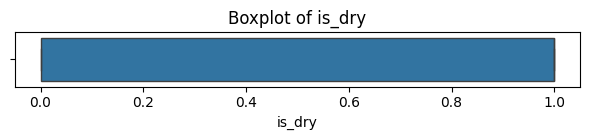

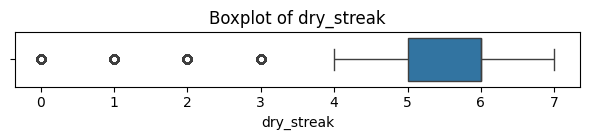

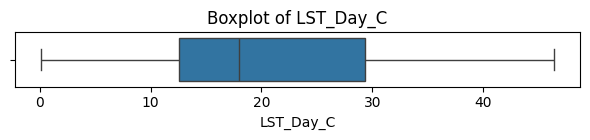

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select numeric columns (you already have `numeric_cols`)
for col in numeric_cols:
    plt.figure(figsize=(6, 1.5))
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot of {col}')
    plt.xlabel(col)
    plt.tight_layout()
    plt.show()


1. #### Columns with significant outliers (heavy right skew/long tails):

* PRCP_prev - Heavy right-tail, many spikes beyond upper whisker
* PRCP - Similar to PRCP_prev with long right tail
* PRCP_7D - Dense concentration near zero with heavy long tail
* AWND_prev - Clear right-side outliers
* AWND_7D and AWND - Both show long right tails


2. #### Columns with mild outliers:

* TMIN, TMAX, TAVG - Mild outliers on the low end (sub-zero temps) and some high-end outliers
* fire_count - Some unusually high values (max = 2 fires/day)


3. #### Columns without outlier issues:

* is_dry - Binary variable (0 or 1)
* dry_streak - Some lower-end values but acceptable
* LST_Day_C - Wide range but no extreme values
* year, month - No outliers, as expected for time-related fields
* Fire_Occurred - Binary target variable

#### Transforming Heavily skewed outliers

In [15]:
from scipy.stats.mstats import winsorize
from sklearn.preprocessing import StandardScaler
import numpy as np

df_winsor = df.copy()
df_transform = df_winsor.copy() 

winsor_cols = ['PRCP', 'PRCP_prev', 'PRCP_7D', 'AWND', 'AWND_prev', 'AWND_7D', 'fire_count']
for col in winsor_cols:
    df_transform[col + '_win'] = winsorize(df_transform[col], limits=[0.01, 0.01])

# transforming precipitation variables
precip_cols = ['PRCP', 'PRCP_prev', 'PRCP_7D']
epsilon = 1e-8
for col in precip_cols:
    win_col = col + '_win'
    df_transform[col + '_nonzero'] = (df_transform[win_col] > 0).astype(int)
    df_transform[col + '_log'] = np.where( df_transform[win_col] > 0, np.log(df_transform[win_col] + epsilon), 0)

# Clipping temperature values (physical plausibility bounds)
temp_cols = ['TMAX', 'TMIN', 'TAVG']
for col in temp_cols:
    df_transform[col + '_clipped'] = np.clip(df_transform[col], -30, 130)

# Standardizing the clipped temperatures
scaler = StandardScaler()
df_transform[[col + '_scaled' for col in temp_cols]] = scaler.fit_transform(
    df_transform[[col + '_clipped' for col in temp_cols]]
)

# Drop the raw original columns
cols_to_drop = winsor_cols + temp_cols
df_transform.drop(columns=cols_to_drop, inplace=True)


### Box Plot of Transformed columns

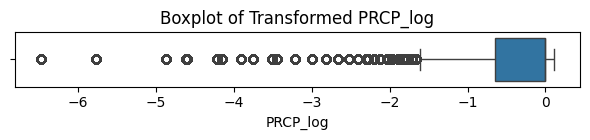

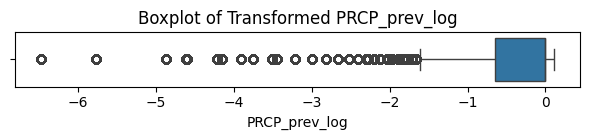

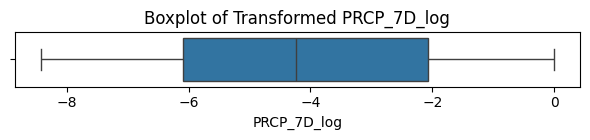

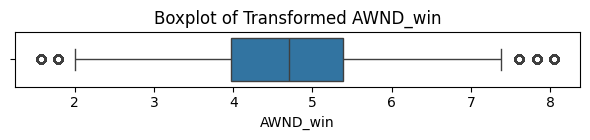

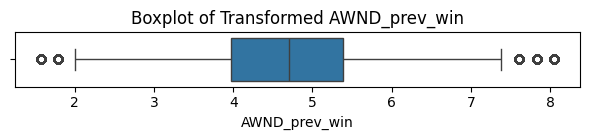

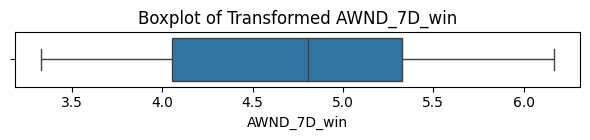

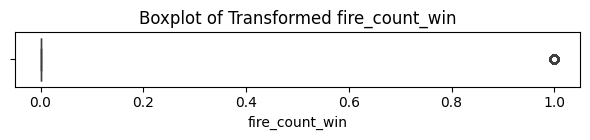

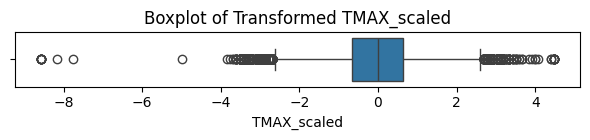

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

# Update with actual transformed column names
transformed_cols = [
    'PRCP_log', 'PRCP_prev_log', 'PRCP_7D_log',        # log-transformed precip
    'AWND_win', 'AWND_prev_win', 'AWND_7D_win',        # winsorized wind
    'fire_count_win',                                  # winsorized fire_count
    'TMAX_scaled'                                      # standardized TMAX
]

# Re-plot boxplots to visually confirm taming
for col in transformed_cols:
    if col in df_transform.columns:
        plt.figure(figsize=(6, 1.5))
        sns.boxplot(x=df_transform[col])
        plt.title(f'Boxplot of Transformed {col}')
        plt.xlabel(col)
        plt.tight_layout()
        plt.show()



1. **PRCP_log, PRCP_prev_log, PRCP_7D_log(Log Transformed)**
- These look significantly better than before
- Outliers are now mostly standardized, though there’s still some residual left-skew due to zero inflation.

2. **AWND, AWND_prev, AWND_7D (Winsorized)**
- Perfectly shaped boxplots, tight IQR, minimal outliers.


3. **fire_count_win**
This shows an extremely skewed distribution with most values near zero and one outlier at 1.0, since it’s a discrete 0/1 distribution.

#### So, converting to categorical and we can analyze fire_count = 1 as a distinct “event” class

In [17]:
df_transform['fire_count_cat'] = df_transform['fire_count_win'].astype(int)

#### Corelation between transformed features and target variable 'Fire occured'

In [18]:
numeric_cols = df_transform.select_dtypes(include=['float64', 'int64']).columns

print(df_transform[numeric_cols].corr()['Fire_Occurred'].sort_values(ascending=False))

Fire_Occurred        1.000000
fire_count_win       1.000000
fire_count_cat       1.000000
TMIN_clipped         0.125248
TMIN_scaled          0.125248
TAVG_scaled          0.122983
TAVG_clipped         0.122983
TMAX_clipped         0.111969
TMAX_scaled          0.111969
LST_Day_C            0.109934
dry_streak           0.058350
AWND_7D_win          0.050902
AWND_prev_win        0.040622
AWND_win             0.040560
is_dry               0.033259
PRCP_prev_log       -0.012800
PRCP_log            -0.012890
PRCP_7D_nonzero     -0.016114
PRCP_nonzero        -0.033267
PRCP_prev_nonzero   -0.033391
PRCP_prev_win       -0.053244
PRCP_win            -0.053253
PRCP_7D_win         -0.064139
PRCP_7D_log         -0.084238
Name: Fire_Occurred, dtype: float64


1. Perfect correlation (1.0) with fire_count_win and fire_count_cat -> This indicates these are essentially the same information as Fire_Occurred or derived directly from it. This perfect correlation suggests redundancy in your features.

2. Temperature variables have the strongest non-perfect correlations:

  - TMIN: 0.125
  - TAVG: 0.123
  - TMAX: 0.112
  - LST_Day_C: 0.110

This suggests higher temperatures are associated with increased fire occurrence, which aligns with what we'd expect ecologically.

3. Month shows a correlation of 0.106, indicating seasonality in fire occurrences.
4. Dry streak (0.058) has a positive but weak correlation, suggesting longer periods without rain may contribute to fires.
5. Wind variables (AWND) show weak positive correlations (0.041-0.051).
6. Precipitation variables show mostly negative correlations (-0.013 to -0.084), with the strongest being PRCP_7D_log at -0.084. This makes sense as more precipitation would reduce fire risk.
7. Year shows a negative correlation (-0.060), which might indicate a declining trend in fires over the study period.

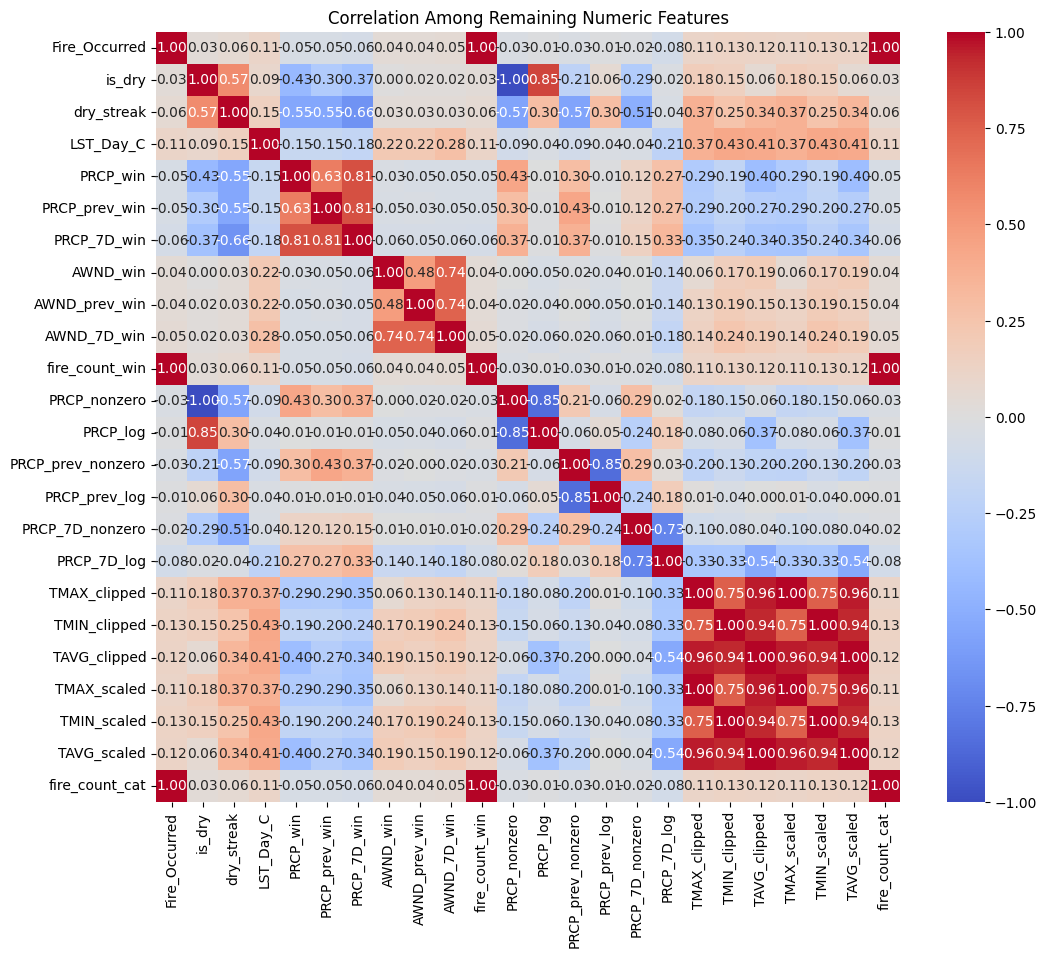

In [19]:
plt.figure(figsize=(12, 10))
sns.heatmap(df_transform[numeric_cols].corr(), cmap='coolwarm', annot=True, fmt=".2f")
plt.title("Correlation Among Remaining Numeric Features")
plt.show()

1. There is extremely high correlation (near 1.0) between several groups of features, particularly among the temperature variables (TMAX/TMIN/TAVG in both clipped and scaled versions) and between fire occurrence metrics (Fire_Occurred, fire_count_win, fire_count_cat).
   
2. Precipitation features show moderate to strong correlations with each other (between PRCP variables and their derivatives like nonzero, log versions), indicating redundant information that could reduce model efficiency.

Removing these columns due to high correlation: "PRCP_log", "PRCP_prev_log", "PRCP_nonzero", "PRCP_prev_nonzero", "TMAX_clipped", "TMIN_clipped", "TAVG_clipped", "fire_count_cat", "fire_count_win". 

**Removing highly correlated features helps prevent multicollinearity issues, which can improve model stability and interpretability**

In [20]:
df_transform = df_transform.drop(columns=[
    "PRCP_log", "PRCP_prev_log", "PRCP_nonzero", "PRCP_prev_nonzero",
    "TMAX_clipped", "TMIN_clipped", "TAVG_clipped", "fire_count_cat", "fire_count_win"])

In [21]:
from sklearn.decomposition import PCA
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
import pandas as pd

X_pca_input = df_transform.drop(columns=['Fire_Occurred'], errors='ignore').select_dtypes(include=['float64', 'int64'])

imputer = SimpleImputer(strategy='mean')
scaler = StandardScaler()

X_imputed = imputer.fit_transform(X_pca_input)
X_scaled = scaler.fit_transform(X_imputed)

# PCA
pca = PCA()
X_pca = pca.fit_transform(X_scaled)

pca_cols = [f'PC{i+1}' for i in range(X_pca.shape[1])]
df_pca = pd.DataFrame(X_pca, columns=pca_cols)

# variance explained
explained_variance = pca.explained_variance_ratio_
print("Explained Variance per PC:")
for i, v in enumerate(explained_variance[:10]):
    print(f"PC{i+1}: {v:.4f}")

Explained Variance per PC:
PC1: 0.2813
PC2: 0.1860
PC3: 0.1444
PC4: 0.1280
PC5: 0.0576
PC6: 0.0534
PC7: 0.0375
PC8: 0.0274
PC9: 0.0230
PC10: 0.0199


### Scree Plot showing top PCs

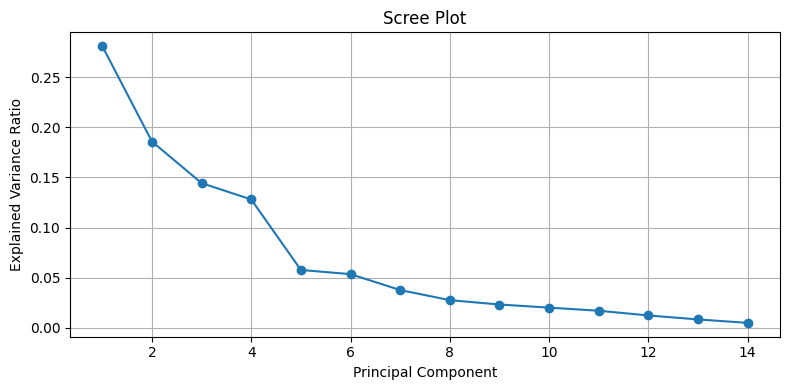

In [22]:
plt.figure(figsize=(8, 4))
plt.plot(range(1, len(explained_variance) + 1), explained_variance, marker='o', linestyle='-')
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.grid(True)
plt.tight_layout()
plt.show()


top_k = 7
pca_columns = [f'PC{i+1}' for i in range(top_k)]
df_pca = pd.DataFrame(X_pca[:, :top_k], columns=pca_columns)

**SCREE PLOT**  - The amount of variance explained by each principal component (PC1 to PC24).

PCA captures as much variance as possible with the fewest components.

**Observation**:

- PC1 explains ~28% of the variance alone

- PC2 adds another ~18%

First 4 PCs together:
0.2813 + 0.1860 + 0.1444 + 0.1280 = ~74% of the total variance

After PC5, the curve flattens → classic "elbow"

#### we choose top 6 PCs which is reasonable — they cumulatively explain a good portion of the variance.

#### Features responsible for the respective Principle components

In [23]:
pca_input_cols = X_pca_input.columns

# Now get the loadings (PCA component weights)
loadings = pd.DataFrame(
    pca.components_[:6],  # Top 6 PCs
    columns=pca_input_cols,
    index=[f'PC{i+1}' for i in range(6)]
)

# Show top contributing features to each PC
for pc in loadings.index:
    print(f"\n Top features contributing to {pc}:")
    print(loadings.loc[pc].abs().sort_values(ascending=False).head(5))


 Top features contributing to PC1:
PRCP_7D_win      0.410583
PRCP_win         0.368384
dry_streak       0.365333
PRCP_prev_win    0.364987
TMAX_scaled      0.287535
Name: PC1, dtype: float64

 Top features contributing to PC2:
AWND_7D_win      0.408314
AWND_win         0.358691
AWND_prev_win    0.355661
dry_streak       0.267080
TMIN_scaled      0.266753
Name: PC2, dtype: float64

 Top features contributing to PC3:
TAVG_scaled      0.433556
TMAX_scaled      0.421927
AWND_7D_win      0.404988
TMIN_scaled      0.387295
AWND_prev_win    0.365464
Name: PC3, dtype: float64

 Top features contributing to PC4:
PRCP_7D_nonzero    0.631156
PRCP_7D_log        0.594517
PRCP_7D_win        0.194582
PRCP_prev_win      0.189135
PRCP_win           0.184662
Name: PC4, dtype: float64

 Top features contributing to PC5:
LST_Day_C        0.945857
TAVG_scaled      0.183080
AWND_win         0.141494
AWND_prev_win    0.134551
AWND_7D_win      0.110891
Name: PC5, dtype: float64

 Top features contributing to


### Features contributing to top 3 principal components

1. **PC1** — “Precipitation-Driven Drought Axis”
Top features: PRCP_7D_win, PRCP_win, dry_streak, PRCP_prev_win, TMAX_scaled
This axis captures long-term and recent rainfall patterns, combined with dry streak intensity.

High PC1 = prolonged dryness + little rain

Directly maps to drought severity and fire readiness of the landscape



2. **PC2** — “Wind Momentum Index”
Top features: AWND_7D_win, AWND_win, AWND_prev_win, dry_streak, TMIN_scaled
Mostly wind-related inputs + low temp + streak.
This component reflects how windy and persistently dry the environment is.

High PC2 suggests sustained wind energy, which can drive fire spread velocity

3. **PC3** — “Thermal-Wind Coupler”
Top features: TAVG_scaled, TMAX_scaled, AWND_7D_win, TMIN_scaled, AWND_prev_win
Classic hot and windy combo.

When temps rise and wind builds up, PC3 soars. Acts like a fire booster signal, critical in identifying rapid ignition potential

4. **PC4** — “7-Day Rain Suppression Factor”
Top features: PRCP_7D_nonzero, PRCP_7D_log, PRCP_7D_win, PRCP_prev_win, PRCP_win
This dimension focuses entirely on multi-day rainfall signal

Very useful in determining fire suppression by recent rain. Lower PC4 = wetter zones with low ignition probability

5. **PC5** — “Heat Load Index”
Top features: LST_Day_C, TAVG_scaled, AWND_win, AWND_prev_win, AWND_7D_win
LST dominates here — essentially surface heat radiation plus minor wind

High PC5 indicates sun-baked land, likely prone to heat-induced ignition

6. **PC6** — “Binary Dryness Flag”
Top features: is_dry, PRCP_prev_win, PRCP_7D_win, PRCP_7D_log, PRCP_7D_nonzero
This component sharply separates dry vs non-dry days

Dominated by the binary is_dry flag

Think of this as a switch: dry environments sharply influence PC6, while wet ones suppress it


### Feature Engineering

In [24]:
df_transform['fire_risk_index'] = np.log1p(
    (df_transform['TMAX_scaled'] ** 1.3 + df_transform['dry_streak']) /
    (df_transform['PRCP_7D_win'] + df_transform['PRCP_prev_win'] + 0.1)
)

In [25]:
df_transform['dryness_score'] = ((df_transform['dry_streak'] > 2).astype(int) * df_transform['is_dry'] * 
                                  (df_transform['AWND_prev_win'] + df_transform['AWND_win']) /
                                  (df_transform['PRCP_win'] + 0.1))

In [26]:
df_transform['dryness_score_improved'] = np.where(
    df_transform['dryness_score'] > 50,
    np.square(df_transform['dryness_score'] - 50) / 100,
    np.log1p(df_transform['dryness_score'])
)

In [27]:
df_transform['dryness_risk_level'] = pd.cut(
    df_transform['dryness_score'].fillna(-1),  # Fill NaN with placeholder value
    bins=[-1, 0, 25, 75, 100, 150, np.inf],
    labels=[0, 1, 2, 3, 4, 5]
).astype('Int64')

In [28]:
df_transform['spread_score'] = np.log1p((df_transform['TAVG_scaled'] + df_transform['AWND_7D_win']) * 
                                         df_transform['LST_Day_C'] * df_transform['is_dry'])

In [29]:
df_transform['wind_temp_combo'] = np.sqrt( df_transform['LST_Day_C'] * df_transform['AWND_7D_win'] + 1)

In [30]:
df_transform['spread_log_scaled'] = np.log1p(
    df_transform['spread_score'].fillna(0) * 10 + 1
)

In [31]:
df_transform['risk_wind_interaction'] = (
    df_transform['fire_risk_index'].fillna(0) * 
    np.log1p(df_transform['wind_temp_combo'].fillna(0))
)

df_transform['exp_risk_wind'] = np.clip(
    np.exp(np.clip((df_transform['fire_risk_index'].fillna(0) - 3) / 2, -10, 10)) * 
    (df_transform['wind_temp_combo'].fillna(0) / 10),
    0, 100  # Cap at reasonable maximum
)

#Combined Risk Score
df_transform['combined_fire_risk'] = (
    (df_transform['fire_risk_index'].fillna(0) - 3) * 2 +
    np.log1p(df_transform['dryness_score'].fillna(0)) / 2 +
    df_transform['spread_score'].fillna(0) / 3 +
    (df_transform['wind_temp_combo'].fillna(0) - 7) / 5
)

# Threshold-based Composite Risk 
df_transform['high_risk_composite'] = (
    (df_transform['fire_risk_index'].fillna(0) > 3.8).astype(int) +
    (df_transform['dryness_score'].fillna(0) > 90).astype(int) +
    (df_transform['spread_score'].fillna(0) > 4).astype(int) +
    (df_transform['wind_temp_combo'].fillna(0) > 14).astype(int)
)

#Nonlinear Interaction 
df_transform['nonlinear_risk'] = (
    np.square(df_transform['fire_risk_index'].fillna(0)) * 
    np.log1p(df_transform['wind_temp_combo'].fillna(0)) *
    np.tanh(df_transform['dryness_score'].fillna(0) / 100)
)

### Using KDE Plot to see distribution of each derived new feature with target variable as well as Heatmap to see the corelation between these newly derived features

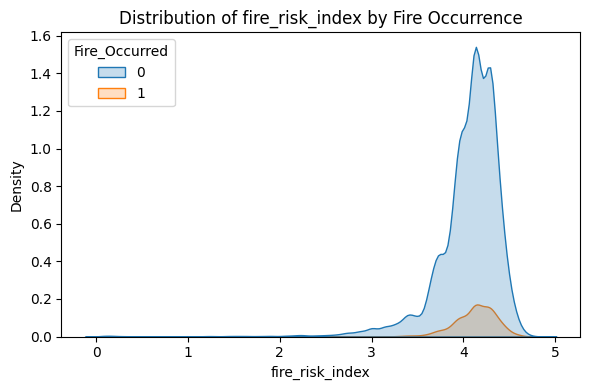

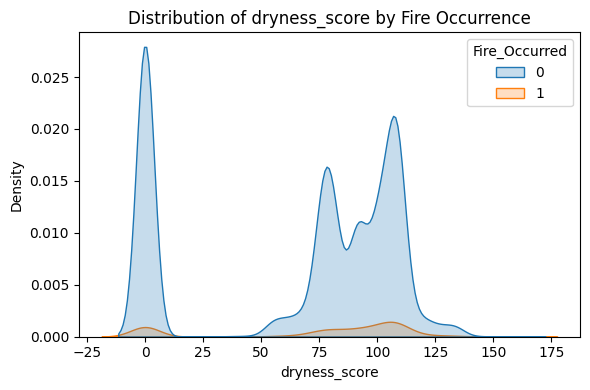

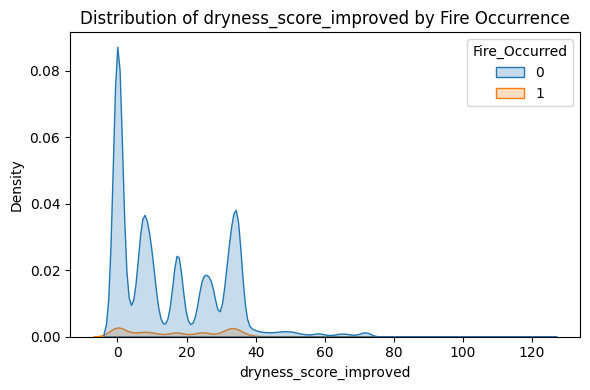

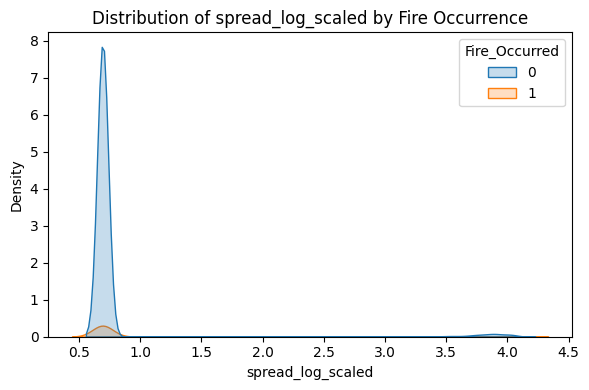

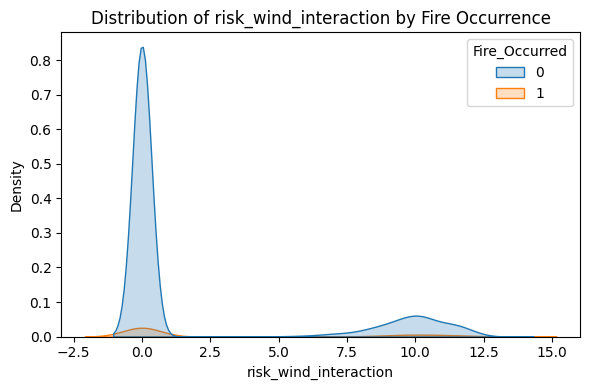

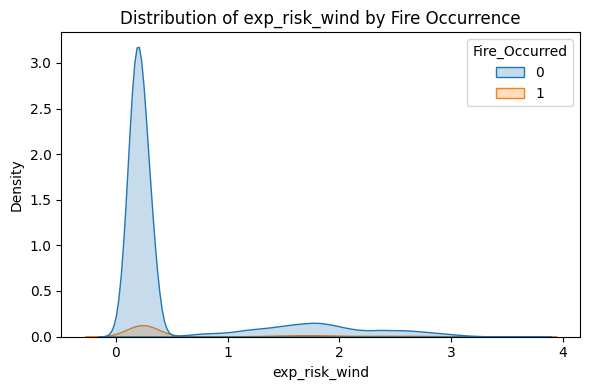

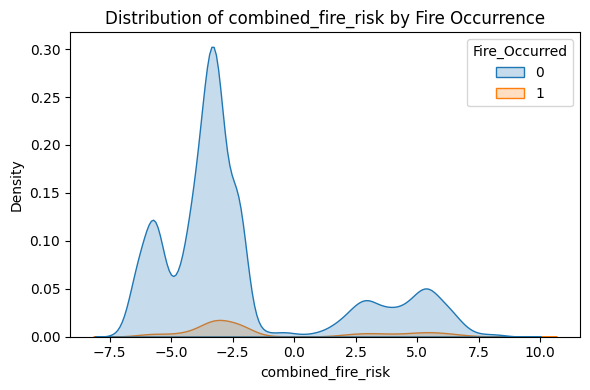

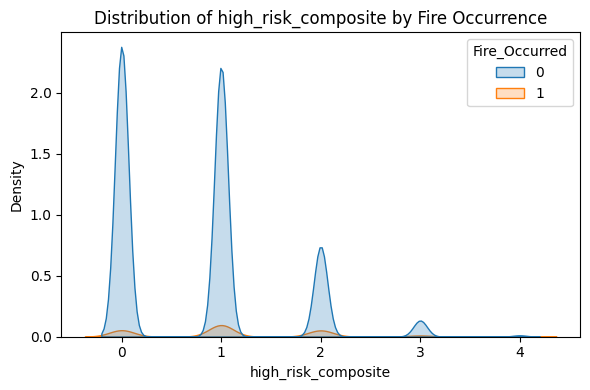

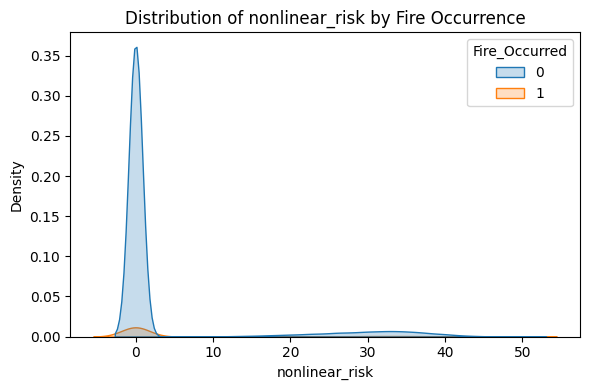

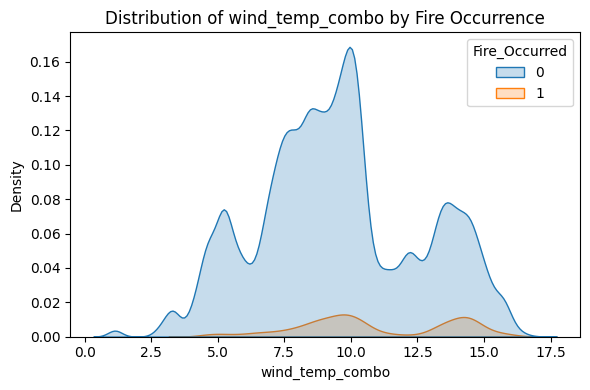

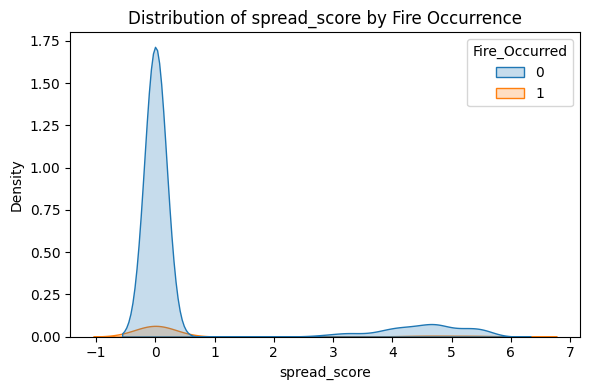

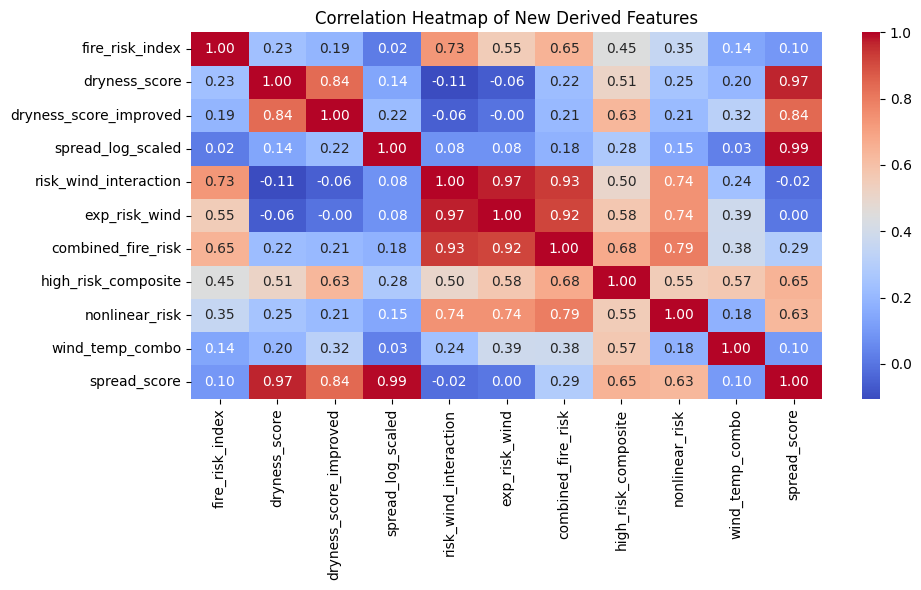

In [32]:
new_features = [
    'fire_risk_index',
    'dryness_score',
    'dryness_score_improved',
    'spread_log_scaled',
    'risk_wind_interaction',
    'exp_risk_wind',
    'combined_fire_risk',
    'high_risk_composite',
    'nonlinear_risk', 'wind_temp_combo', 'spread_score'
]

existing_features = [col for col in new_features if col in df_transform.columns]
df_new_feats = df_transform[existing_features + ['Fire_Occurred']].copy()

# KDE distributions by Fire_Occurred
for col in existing_features:
    plt.figure(figsize=(6, 4))
    sns.kdeplot(data=df_new_feats, x=col, hue='Fire_Occurred', fill=True)
    plt.title(f"Distribution of {col} by Fire Occurrence")
    plt.tight_layout()

# Plot correlation heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(df_new_feats[existing_features].corr(), annot=True, fmt=".2f", cmap='coolwarm')
plt.title("Correlation Heatmap of New Derived Features")
plt.tight_layout()
plt.show()


Based on the correlation patterns, we chose only 5 derived features as final:

**combined_fire_risk** - This appears to be a well-balanced composite feature that correlates moderately with most other features (0.65 with fire_risk_index, 0.68 with high_risk_composite, 0.79 with nonlinear_risk) without being completely redundant with any of them. It likely captures multiple dimensions of fire risk.

**high_risk_composite** - This feature has balanced correlations with all other features (ranging from 0.28 to 0.68), suggesting it captures information across multiple dimensions. It's particularly valuable because it has moderate correlation with wind_temp_combo (0.57), which some other features don't capture well.

**nonlinear_risk** - This captures nonlinear relationships and has a unique correlation pattern, particularly with the dryness features.

**spread_log_scaled** - This feature has very low correlation with most other derived features (especially the risk_wind features), indicating it captures unique information that other features miss.

**fire_risk_index** - The original feature still provides value as it has moderate correlation with some features and low correlation with others.


#### We are dropping these new derived features. 

1. dryness_score/dryness_score_improved/spread_score (extremely high correlation with each other - 0.84-0.99)
2. risk_wind_interaction/exp_risk_wind (0.97 correlation shows they're essentially the same feature)


### Additional Feature Importance

In [33]:
pca_cols = ['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6']

# Derived features selected based on correlation & usefulness
derived_features = [
    'fire_risk_index',
    'nonlinear_risk',
    'spread_log_scaled',
    'high_risk_composite',
    'combined_fire_risk'
]

# Combining PCA and derived features into one final dataframe
df_final = pd.concat([
    df_pca[pca_cols].reset_index(drop=True),
    df_transform[derived_features].reset_index(drop=True)
], axis=1)

### Mutual Information scores

In [34]:
from sklearn.feature_selection import mutual_info_classif
X_mi = df_final.fillna(df_final.mean()).copy()
y_mi = df_transform['Fire_Occurred']

mi_scores = mutual_info_classif(X_mi, y_mi, discrete_features='auto')
mi_series = pd.Series(mi_scores, index=X_mi.columns).sort_values(ascending=False)
print("\n Mutual Information Scores:")
print(mi_series)


 Mutual Information Scores:
combined_fire_risk     0.053068
spread_log_scaled      0.042459
fire_risk_index        0.032563
PC1                    0.027739
PC5                    0.022589
PC6                    0.021983
PC2                    0.021152
PC4                    0.019991
PC3                    0.018947
high_risk_composite    0.018923
nonlinear_risk         0.002195
dtype: float64


### Random Forrest Feature Importance score

In [35]:
from sklearn.ensemble import RandomForestClassifier

# Fit the RF model
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_mi, y_mi)

rf_series = pd.Series(rf.feature_importances_, index=X_mi.columns).sort_values(ascending=False)

print("\n Random Forest Feature Importances:")
print(rf_series)



 Random Forest Feature Importances:
PC5                    0.144433
combined_fire_risk     0.140194
PC1                    0.132949
PC4                    0.132175
PC6                    0.126422
PC2                    0.124865
PC3                    0.124610
fire_risk_index        0.035949
nonlinear_risk         0.023897
high_risk_composite    0.008517
spread_log_scaled      0.005988
dtype: float64


### Plotting both of them together to see their relative importance

<Figure size 1000x600 with 0 Axes>

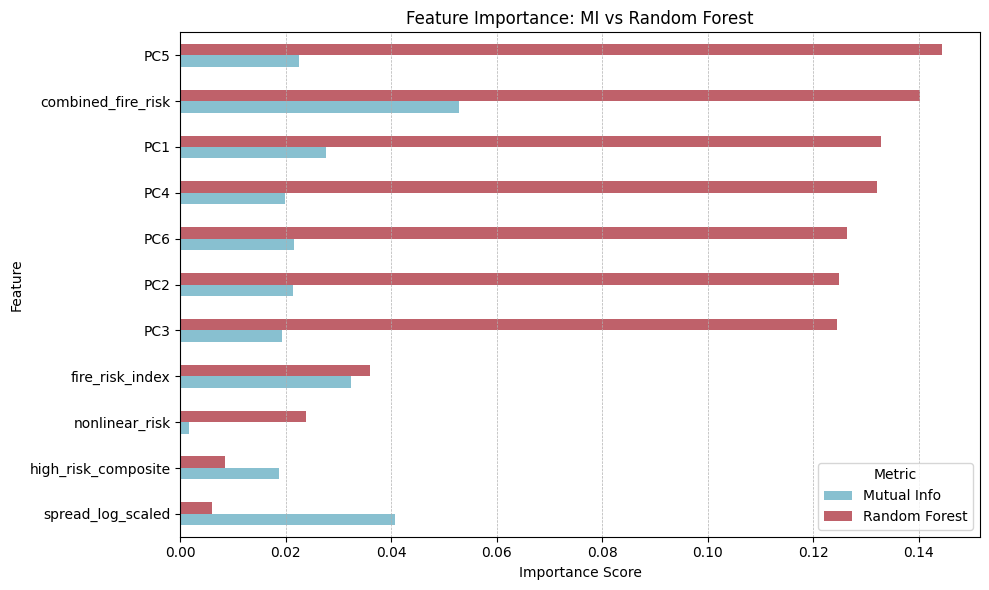

In [36]:
mi_scores = {
    'combined_fire_risk': 0.052921,
    'spread_log_scaled': 0.040713,
    'fire_risk_index': 0.032279,
    'PC1': 0.027626,
    'PC5': 0.022494,
    'PC6': 0.021619,
    'PC2': 0.021438,
    'PC4': 0.019872,
    'PC3': 0.019226,
    'high_risk_composite': 0.018700,
    'nonlinear_risk': 0.001621
}

rf_scores = {
    'PC5': 0.144433,
    'combined_fire_risk': 0.140194,
    'PC1': 0.132949,
    'PC4': 0.132175,
    'PC6': 0.126422,
    'PC2': 0.124865,
    'PC3': 0.124610,
    'fire_risk_index': 0.035949,
    'nonlinear_risk': 0.023897,
    'high_risk_composite': 0.008517,
    'spread_log_scaled': 0.005988
}

# Combine into a DataFrame
df_scores = pd.DataFrame([mi_scores, rf_scores]).T
df_scores.columns = ['Mutual Info', 'Random Forest']
df_scores = df_scores.sort_values(by='Random Forest', ascending=True)

# Plot side-by-side horizontal bars
plt.figure(figsize=(10, 6))
df_scores.plot(kind='barh', figsize=(10, 6), color=['#88c0d0', '#bf616a'])
plt.title("Feature Importance: MI vs Random Forest")
plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.legend(title="Metric")
plt.grid(True, axis='x', linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()


### Key Observations:

#### Top Performing Features (Both MI and RF):

- **combined_fire_risk** - Highest scorer in both MI and RF metrics.
Captures multiple dimensions of risk (temperature, dryness, spread) and shows strong standalone information as well as high usefulness for splitting in tree models.

- **PC1, PC5, PC6**:
These PCA components are consistently ranked highly in both MI and RF.
They represent fundamental variance directions in the data


#### Features RF Prefers That MI Doesn't:

- **PC4, PC2, PC3**:
These PCs have strong Random Forest importance but modest MI scores.
Suggests they are nonlinearly interacting with other variables inside tree models, even if alone they don't hold extreme independent information.


#### Features MI Likes That RF Doesn't:

- **pread_log_scaled**:
Has reasonable MI (shows unique spread behavior), but RF finds it less useful for splitting.
Likely because its information is more continuous or smoother, which decision trees aren't as sharp at handling without binning.

- **fire_risk_index**:
Shows okay MI but low RF importance.
Probably too linear, SVM/logistic-type models might appreciate it more, but trees don't benefit as much from it once they already have dryness, wind, and composite features.

#### PC3 had the lowest MI score (0.0192) among PC1–PC6.

Random Forest score for PC3 is good (0.1246), but still slightly lower than PC5, PC1, PC4, PC6, and PC2.

Other PCs like PC5, PC1, PC4, PC6 had better combined MI + RF performance.

Priority is given to the top 5 PCs (PC1, PC2, PC4, PC5, PC6) for feature compactness and avoiding model overfitting.

### Removed PC3

### KNN IMPUTATION and BORDERLINE SMOTE

In [37]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.impute import KNNImputer
from sklearn.pipeline import Pipeline
from collections import Counter
from imblearn.combine import SMOTETomek
from imblearn.over_sampling import BorderlineSMOTE

In [38]:
final_features = [
    'PC1', 'PC2', 'PC4', 'PC5', 'PC6',  # PCA components
    'combined_fire_risk', 'fire_risk_index', 'spread_log_scaled', 'high_risk_composite', 'nonlinear_risk'
]

df_model = pd.concat([
    df_pca[['PC1', 'PC2', 'PC4', 'PC5', 'PC6']].reset_index(drop=True),
    df_transform[['combined_fire_risk', 'fire_risk_index', 'spread_log_scaled', 'high_risk_composite', 'nonlinear_risk', 'Fire_Occurred']].reset_index(drop=True)
], axis=1)

# Feature Matrix and Target
X = df_model[final_features].copy()
y = df_model['Fire_Occurred'].copy()

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

# Preprocessing Pipeline: Scaling + KNN Imputation
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('imputer', KNNImputer(n_neighbors=2))
])


In [39]:
X_train_processed = pipeline.fit_transform(X_train)
X_test_processed = pipeline.transform(X_test)

In [40]:
use_borderline = True  

if use_borderline:
    sampler = BorderlineSMOTE(random_state=42)
else:
    sampler = SMOTETomek(random_state=42, n_jobs=-1)

X_train_balanced, y_train_balanced = sampler.fit_resample(X_train_processed, y_train)

before_counts = Counter(y_train)  # from original train split
after_counts = Counter(y_train_balanced)

print("Before SMOTE:", Counter(y_train))
print("After SMOTE:", Counter(y_train_balanced))

Before SMOTE: Counter({0: 168428, 1: 11584})
After SMOTE: Counter({1: 166712, 0: 166712})


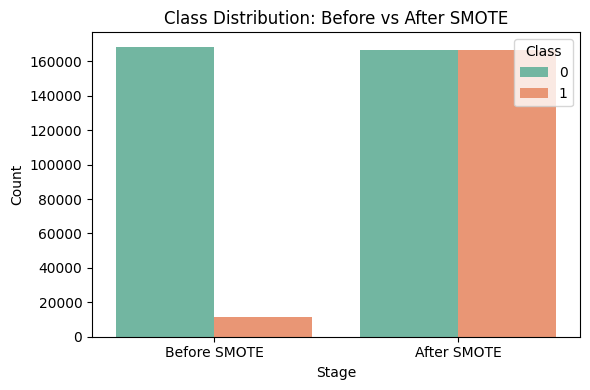

In [41]:
# DataFrame for plotting
df_balance = pd.DataFrame({
    'Stage': ['Before SMOTE'] * 2 + ['After SMOTE'] * 2,
    'Class': [0, 1] * 2,
    'Count': [before_counts[0], before_counts[1], after_counts[0], after_counts[1]]
})

plt.figure(figsize=(6, 4))
sns.barplot(data=df_balance, x='Stage', y='Count', hue='Class', palette='Set2')
plt.title("Class Distribution: Before vs After SMOTE")
plt.tight_layout()
plt.show()


### Model Development

In [42]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

# Train SVM with best hyperparameters
svm_model = SVC(
    kernel='rbf',
    C=5,
    gamma='scale',
    class_weight= 'balanced',
    probability=False,
    random_state=42
)

In [43]:
svm_model.fit(X_train_balanced, y_train_balanced)

SVC(C=5, class_weight='balanced', random_state=42)

In [44]:
from sklearn.calibration import CalibratedClassifierCV

cal = CalibratedClassifierCV(svm_model, cv=3, method='sigmoid')
cal.fit(X_train_balanced, y_train_balanced)

CalibratedClassifierCV(cv=3,
                       estimator=SVC(C=5, class_weight='balanced',
                                     random_state=42))


Threshold = 0.50
Accuracy: 0.5985245755932806
ROC AUC: 0.7139878563711729
Confusion Matrix:
 [[24811 17297]
 [  771  2125]]
Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.59      0.73     42108
           1       0.11      0.73      0.19      2896

    accuracy                           0.60     45004
   macro avg       0.54      0.66      0.46     45004
weighted avg       0.91      0.60      0.70     45004


Threshold = 0.55
Accuracy: 0.632299351168785
ROC AUC: 0.7139878563711729
Confusion Matrix:
 [[26494 15614]
 [  934  1962]]
Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.63      0.76     42108
           1       0.11      0.68      0.19      2896

    accuracy                           0.63     45004
   macro avg       0.54      0.65      0.48     45004
weighted avg       0.91      0.63      0.73     45004


Threshold = 0.60
Accuracy: 0.6658963647675762
RO

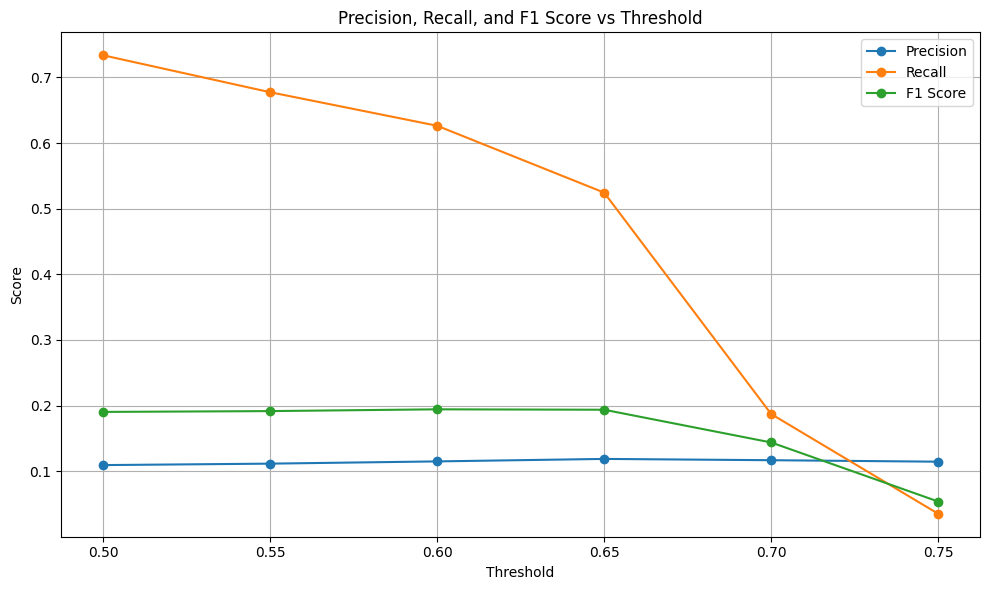

In [45]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, accuracy_score, roc_auc_score, classification_report, roc_curve, precision_recall_curve, auc
import numpy as np

y_proba = cal.predict_proba(X_test_processed)[:, 1]

thresholds = np.arange(0.5, 0.76, 0.05)
precisions = []
recalls = []
f1s = []
predictions_list = [] 

for t in thresholds:
    y_pred_thresh = (y_proba > t).astype(int)
    
    precisions.append(precision_score(y_test, y_pred_thresh))
    recalls.append(recall_score(y_test, y_pred_thresh))
    f1s.append(f1_score(y_test, y_pred_thresh))
    predictions_list.append(y_pred_thresh)  
    
    print(f"\nThreshold = {t:.2f}")
    print("Accuracy:", accuracy_score(y_test, y_pred_thresh))
    print("ROC AUC:", roc_auc_score(y_test, y_proba))
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_thresh))
    print("Classification Report:\n", classification_report(y_test, y_pred_thresh))

plt.figure(figsize=(10, 6))
plt.plot(thresholds, precisions, label='Precision', marker='o')
plt.plot(thresholds, recalls, label='Recall', marker='o')
plt.plot(thresholds, f1s, label='F1 Score', marker='o')
plt.xlabel('Threshold')
plt.ylabel('Score')
plt.title('Precision, Recall, and F1 Score vs Threshold')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [46]:
df_preds = pd.DataFrame()

for i, t in enumerate(thresholds):
    df_preds[f'pred_thresh_{t:.2f}'] = predictions_list[i]

# Add true labels for reference
df_preds['True_Label'] = y_test.reset_index(drop=True)
print(df_preds.head())

   pred_thresh_0.50  pred_thresh_0.55  pred_thresh_0.60  pred_thresh_0.65  \
0                 1                 1                 1                 1   
1                 1                 1                 1                 0   
2                 0                 0                 0                 0   
3                 1                 1                 1                 1   
4                 0                 0                 0                 0   

   pred_thresh_0.70  pred_thresh_0.75  True_Label  
0                 0                 0           1  
1                 0                 0           0  
2                 0                 0           0  
3                 0                 0           0  
4                 0                 0           0  


### Recall curve

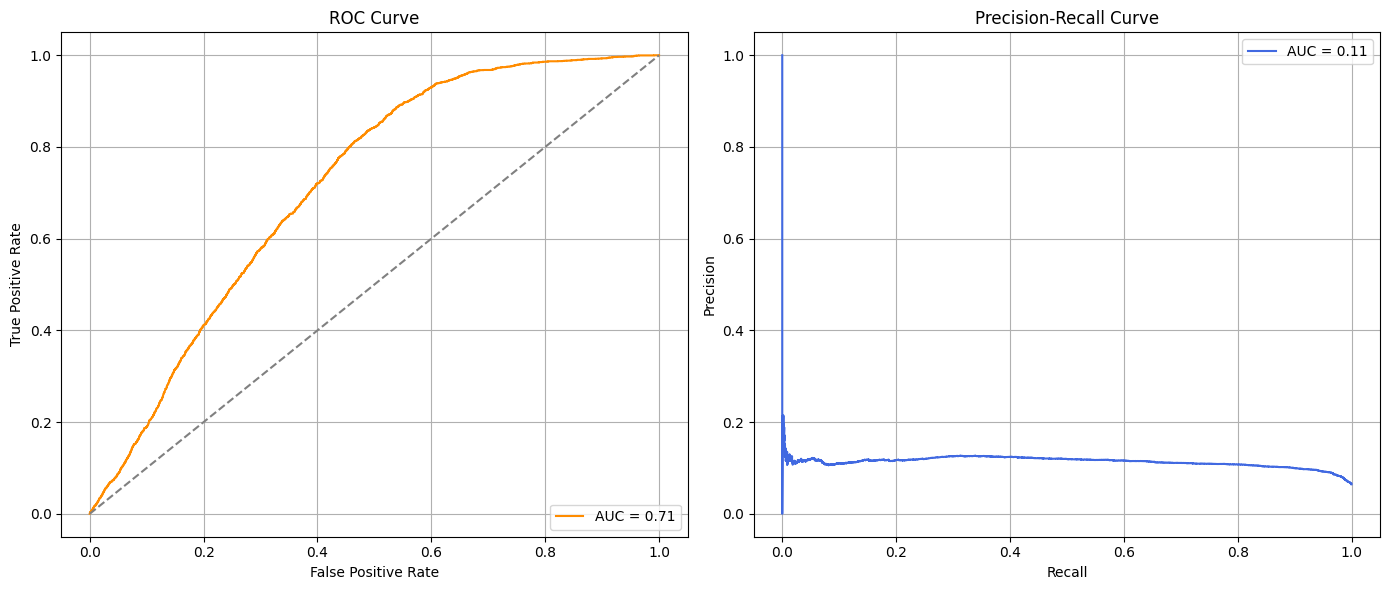

In [47]:
from sklearn.metrics import roc_curve, precision_recall_curve, auc

# ROC curve
fpr, tpr, _ = roc_curve(y_test, y_proba)
roc_auc = auc(fpr, tpr)

# Precision-Recall curve
prec, rec, _ = precision_recall_curve(y_test, y_proba)
pr_auc = auc(rec, prec)

# Plot both curves
fig, axs = plt.subplots(1, 2, figsize=(14, 6))

# ROC Curve
axs[0].plot(fpr, tpr, label=f"AUC = {roc_auc:.2f}", color='darkorange')
axs[0].plot([0, 1], [0, 1], linestyle='--', color='gray')
axs[0].set_title("ROC Curve")
axs[0].set_xlabel("False Positive Rate")
axs[0].set_ylabel("True Positive Rate")
axs[0].legend(loc="lower right")
axs[0].grid(True)

# Precision-Recall Curve
axs[1].plot(rec, prec, label=f"AUC = {pr_auc:.2f}", color='royalblue')
axs[1].set_title("Precision-Recall Curve")
axs[1].set_xlabel("Recall")
axs[1].set_ylabel("Precision")
axs[1].legend(loc="upper right")
axs[1].grid(True)

plt.tight_layout()
plt.show()



In [48]:
import pandas as pd
#Best thresold
threshold = 0.60
y_pred_thresh = (y_proba > threshold).astype(int)

df_final_preds = pd.DataFrame()

# Add features used for training
df_final_preds = X_test.reset_index(drop=True).copy()

# Add actual target
df_final_preds['True_Label'] = y_test.reset_index(drop=True)

# Add predicted label
df_final_preds['Predicted_Label'] = y_pred_thresh

# Add predicted probability
df_final_preds['Predicted_Probability'] = y_proba

df_final_preds['Prediction_Confidence'] = np.abs(y_proba - threshold)
print(df_final_preds.head())

print("Accuracy:", accuracy_score(y_test, y_pred_thresh))
print("ROC AUC:", roc_auc_score(y_test, y_proba))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_thresh))
print("Classification Report:\n", classification_report(y_test, y_pred_thresh))

        PC1       PC2       PC4       PC5       PC6  combined_fire_risk  \
0 -0.455284 -0.998163  1.132677  0.099407  0.702373           -3.409482   
1  7.841592  1.506066 -0.413556  2.098198  1.410963           -4.925309   
2 -0.844650  0.383043  0.687092  0.792907  0.435310           -2.687675   
3 -1.959909  2.983850  0.579699 -1.345649 -1.013860            2.895280   
4 -1.251862  1.013980  0.380489 -1.089356  0.715809            4.874981   

   fire_risk_index  spread_log_scaled  high_risk_composite  nonlinear_risk  \
0              NaN           0.693147                    0        0.000000   
1              NaN           0.693147                    0        0.000000   
2              NaN           0.693147                    1        0.000000   
3         4.170463           0.693147                    1        0.000000   
4         4.094649           0.693147                    2       30.321379   

   True_Label  Predicted_Label  Predicted_Probability  Prediction_Confidence  
0

In [49]:
# Save the predictions and features to a CSV file
df_final_preds.to_csv('model_predictions_for_ensemble.csv', index=False)


### Best Threshold

In [50]:
y_proba = cal.predict_proba(X_test_processed)[:, 1]

#Apply best threshold
threshold = 0.60
y_pred_best = (y_proba > threshold).astype(int)

print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_best))
print("\nClassification Report:\n", classification_report(y_test, y_pred_best))
print("Accuracy:", accuracy_score(y_test, y_pred_best))
print("ROC AUC:", roc_auc_score(y_test, y_proba))

Confusion Matrix:
 [[28154 13954]
 [ 1082  1814]]

Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.67      0.79     42108
           1       0.12      0.63      0.19      2896

    accuracy                           0.67     45004
   macro avg       0.54      0.65      0.49     45004
weighted avg       0.91      0.67      0.75     45004

Accuracy: 0.6658963647675762
ROC AUC: 0.7139878563711729


### Other Important Metrics

1. Matthews Correlation Coefficient (MCC):

In [51]:
from sklearn.metrics import matthews_corrcoef
mcc = matthews_corrcoef(y_test, y_pred_thresh)
print("Matthews Correlation Coefficient (MCC):", mcc)

Matthews Correlation Coefficient (MCC): 0.151722271076382


2. Balanced Accuracy

In [52]:
from sklearn.metrics import balanced_accuracy_score
balanced_acc = balanced_accuracy_score(y_test, y_pred_best)
print("Balanced Accuracy:", balanced_acc)

Balanced Accuracy: 0.6474976277785038


3. Lift

In [53]:
from sklearn.metrics import (
    matthews_corrcoef, 
    balanced_accuracy_score, 
    precision_recall_curve, 
    auc
)
def compute_lift(y_true, y_scores, top_percent=0.1):
    n = int(len(y_scores) * top_percent)
    top_indices = np.argsort(y_scores)[-n:]
    lift = y_true[top_indices].sum() / (y_true.sum() * top_percent)
    return lift

lift_10 = compute_lift(y_test.values, y_proba, top_percent=0.1)
print("Lift @ Top 10%:", lift_10)

Lift @ Top 10%: 1.8162983425414363


#### Support Vectors and their weights

In [54]:
print("\nSupport vectors per class:", svm_model.n_support_)  
print("Total # support vectors:   ", svm_model.support_vectors_.shape[0])

# show the first few
sv = svm_model.support_vectors_
print("\nFirst 5 support vectors (in your original feature space):")
print(pd.DataFrame(sv[:5], columns=final_features).round(3))

# and their dual coefficients (αᵢ⋅yᵢ)
print("\nTheir corresponding dual coefficients (first 5):")
print(svm_model.dual_coef_[:, :5].round(3))


Support vectors per class: [115762 115843]
Total # support vectors:    231605

First 5 support vectors (in your original feature space):
     PC1    PC2    PC4    PC5    PC6  combined_fire_risk  fire_risk_index  \
0 -1.242  1.881 -0.227  0.652 -1.838               1.681            0.583   
1 -0.595  0.718  0.299 -0.911  0.669              -0.328           -1.702   
2 -0.099 -1.015  0.757  0.660  0.679              -0.381           -4.425   
3 -0.018  0.065  0.671  0.365 -1.347              -0.920           -9.927   
4 -0.713  1.773  0.011  0.561 -1.820               1.436           -0.581   

   spread_log_scaled  high_risk_composite  nonlinear_risk  
0             -0.174                1.534          -0.376  
1             -0.174                0.280          -0.376  
2             -0.174               -0.973          -0.376  
3             -0.174               -0.973          -0.376  
4             -0.174                1.534          -0.376  

Their corresponding dual coefficients 